In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

from projects.data_profiling.data_profiler import DataProfiler
from projects.data_profiling.outlier_detection import OutlierDetection
from projects.data_quality_validation.data_quality_checks import DataQualityChecks
from projects.data_quality_validation.schema_definition import WINE_QUALITY_TYPE_SCHEMA, WINE_QUALITY_RANGE_SCHEMA
from projects.data_quality_validation.schema_validation import SchemaValidation
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

In [2]:
data_checks = DataQualityChecks("./../datasets/wine_quality_corrupted.csv")
df = data_checks.get_dataframe()
schema_validation = SchemaValidation(df)
outlier_detection = OutlierDetection(df)
data_profiler = DataProfiler(df)

print("Dataset Preview:")
df.head()

Dataset loaded successfully.
Dataset Preview:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,3.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,4.0


In [3]:
# Validate Schema
logging.info("Starting schema validation...")
column_check = schema_validation.check_column_names(schema=WINE_QUALITY_TYPE_SCHEMA)
print("Column Name Check Results:", column_check)

type_check = schema_validation.check_data_types(type_schema=WINE_QUALITY_TYPE_SCHEMA)
print("Data Type Check Results:", type_check)

schema_result = schema_validation.validate_ranges(ranges_schema=WINE_QUALITY_RANGE_SCHEMA)
print("Schema Validation Result:", schema_result)

2025-04-02 11:18:21,869 - INFO - Starting schema validation...


Column Name Check Results: {'missing_columns': [], 'extra_columns': []}
Data Type Check Results: {}
Schema Validation Result: 9 invalid rows in column 'fixed acidity'.
28 invalid rows in column 'chlorides'.
3 invalid rows in column 'density'.
2 invalid rows in column 'pH'.
1 invalid rows in column 'alcohol'.


In [4]:
# Data Quality Checks
print("Null Values Count:")
print(data_checks.check_null_values())
print(f"Duplicate Rows: {data_checks.check_duplicates()}")
logging.info("Data quality checks completed.")

2025-04-02 11:18:21,902 - INFO - Data quality checks completed.


Null Values Count:
alcohol    52
quality     5
Id          5
dtype: int64
Duplicate Rows: 10


In [5]:
# Perform outliers checks
print("Outliers based on Z-score:")
print(outlier_detection.check_outliers_zscore())
print("Outliers based on IQR:")
print(outlier_detection.check_outliers_iqr())

# Data profiling step
data_profiler.generate_statistics()

Outliers based on Z-score:
123
Outliers based on IQR:
fixed acidity            744.400000
volatile acidity          16.825000
citric acid                1.000000
residual sugar           681.950000
chlorides                 15.536000
free sulfur dioxide     1023.000000
total sulfur dioxide    5740.000000
density                   39.955990
pH                        68.650000
sulphates                 52.960000
alcohol                  183.866667
quality                  146.000000
dtype: float64
Descriptive Statistics:
                       count        mean         std    min         25%  \
fixed acidity         1158.0    8.412003    2.482085  4.600    7.100000   
volatile acidity      1158.0    0.532306    0.179545  0.120    0.400000   
citric acid           1158.0    0.268981    0.196931  0.000    0.090000   
residual sugar        1158.0    2.550604    1.387934  0.900    1.900000   
chlorides             1158.0    0.086712    0.047054  0.012    0.070000   
free sulfur dioxide   115

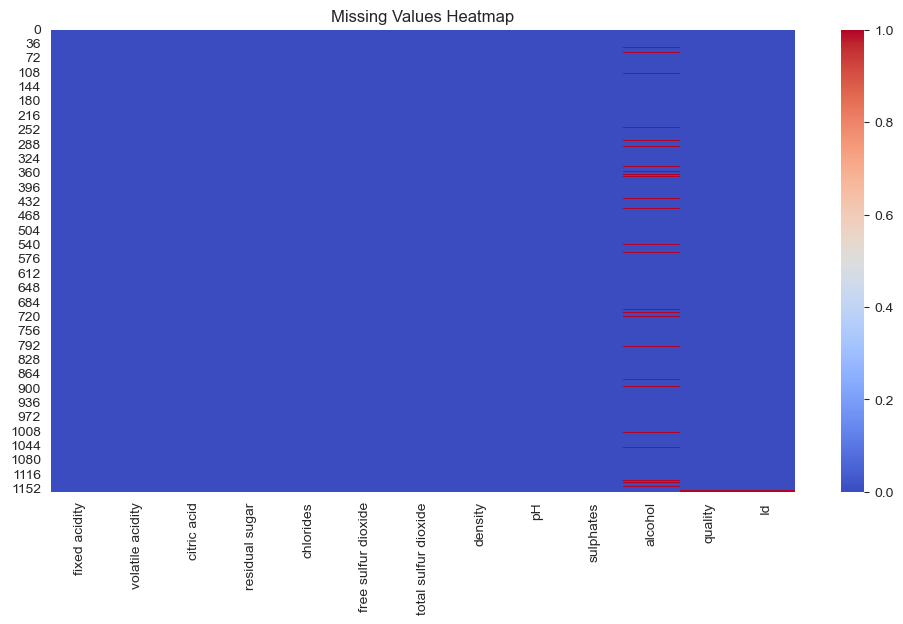

In [6]:
# Visualizing Missing Values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='coolwarm').set_title('Missing Values Heatmap')
plt.show()

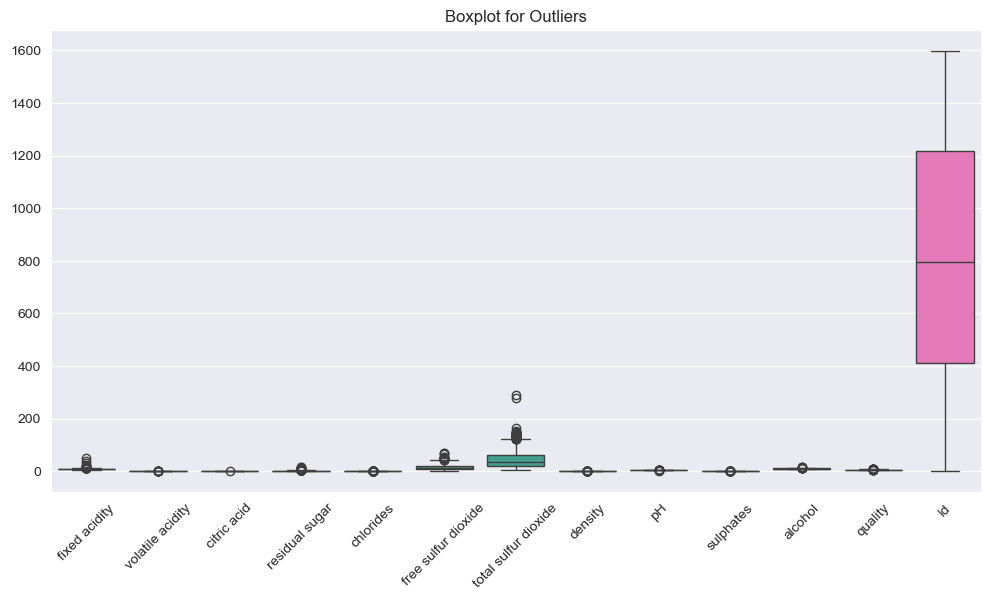

In [7]:
# Visualizing Outliers using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number])).set_title('Boxplot for Outliers')
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

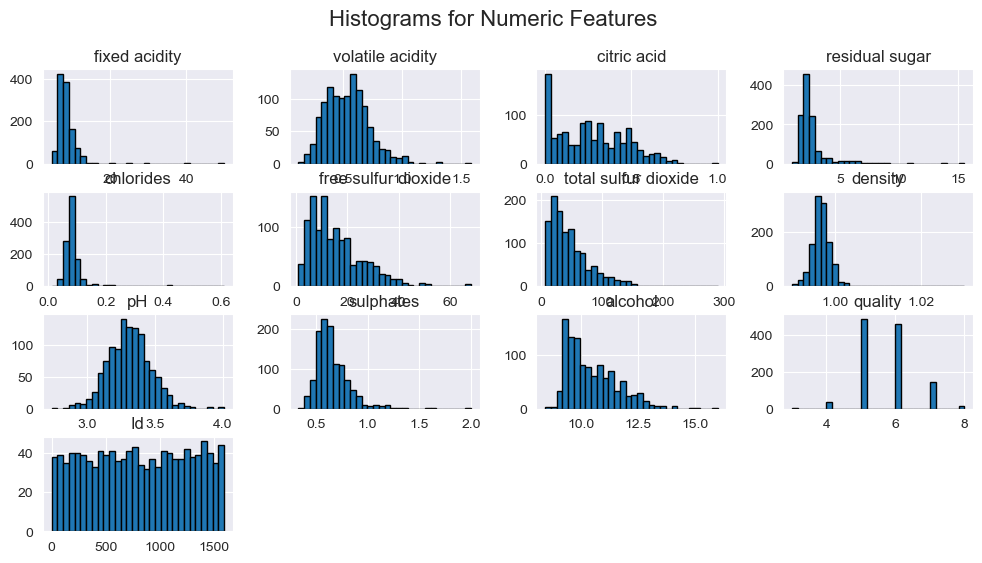

In [8]:
# Histograms for Numeric Features
plt.figure(figsize=(12, 6))
df.select_dtypes(include=[np.number]).hist(bins=30, figsize=(12, 6), edgecolor='black')
plt.suptitle('Histograms for Numeric Features', fontsize=16)
plt.show()